In [34]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\bifurcation\\")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\bifurcation`


In [35]:
using BifurcationKit, Setfield, LinearAlgebra, Plots, Parameters

In [36]:
function model_braint_rhythms(u, p)

    sE, sI, rE, rI, Y = u
    τsE, γE, s0E, τsI, γI, s0I, τrE, kE, IE, wEE, wIE, θE, τrI, kI, II, wEI, wII, θI, τY, βY, gammaY, ythr, sEthr, kY = p

    g(Y) = 1 + gammaY / (1 + exp(-Y + ythr))
    HevY(sE) = 1/(1 + exp(-(sE - sEthr)/kY))

    dsEdt = (1/τsE) *(-sE + γE*rE*(1-sE)*g(Y) + s0E)
    dsIdt = (1/τsI) *(-sI + γI*rI*(1-sI) + s0I)

    drEdt = (1/ τrE) *(-rE + 1/(1 + exp(-kE*((IE + wEE*sE-wIE*sI) -  θE))))
    drIdt = (1/τrI) *(-rI + 1/(1 + exp(-kI*((II + wEI*sE-wII*sI) - θI))))
    
    dYdt = -Y / τY + βY * HevY(sE)
    
    return [dsEdt, dsIdt, drEdt, drIdt, dYdt]
end

model_braint_rhythms (generic function with 1 method)

In [37]:
τsE_ = 3.0; γE_ = 4.0; s0E_ = 0.15;
τsI_ = 10.0; γI_ = 8.0; s0I_ = 0.1;

τrE_ = 2.0; kE_ = 5.0; IE_ = 0.9; wEE_ = 3.5; wIE_ = 5.0; θE_ = 0.2;
τrI_ = 6.0; kI_ = 5.0; II_ = 0.0; wEI_ = 5.0; wII_ = 3.0; θI_ = 0.4;

τY_ = 0.01;  βY_ = 0.01;
ythr_ = 0.5; sEthr_ = 0.5; kY_ = 0.01
γY_ = 0.0

0.0

In [38]:
param =  (τsE = τsE_, γE = γE_, s0E = s0E_, τsI = τsI_, γI = γI_,
         s0I = s0I_, τrE = τrE_, kE = kE_, IE = IE_, wEE = wEE_, wIE = wIE_,
        θE = θE_, τrI = τrI_, kI = kI_, II = II_, wEI = wEI_, wII = wII_, θI = θI_, τY = τY_, βY = βY_, γY = γY_, ythr = ythr_, sEthr = sEthr_, kY = kY_)

(τsE = 3.0, γE = 4.0, s0E = 0.15, τsI = 10.0, γI = 8.0, s0I = 0.1, τrE = 2.0, kE = 5.0, IE = 0.9, wEE = 3.5, wIE = 5.0, θE = 0.2, τrI = 6.0, kI = 5.0, II = 0.0, wEI = 5.0, wII = 3.0, θI = 0.4, τY = 0.01, βY = 0.01, γY = 0.0, ythr = 0.5, sEthr = 0.5, kY = 0.01)

In [39]:
fp0 = [0.2522329213720189, 0.45021724371685473, 0.034179400342014936, 0.07962627958826166, 1.7362509463131359e-15];

In [40]:
prob_rate = BifurcationProblem(model_braint_rhythms, fp0, param, (@lens _.wEE))

┌─ Bifurcation Problem with uType Vector{Float64}
├─ Inplace:  false
├─ Symmetric: false
└─ Parameter: wEE

In [41]:
opt_new = NewtonPar(maxIter = 3, tol = 1e-6)
pmax, pmin = 10.0, 0.0

(10.0, 0.0)

In [42]:
opts_con = ContinuationPar(pMin = pmin, pMax = pmax,
                            ds = 0.001, dsmin = 1e-5, dsmax = 0.1,
                            nev = 3, detectBifurcation = 3, newtonOptions  = opt_new,
                            maxSteps  = 300)

ContinuationPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  dsmin: Float64 1.0e-5
  dsmax: Float64 0.1
  ds: Float64 0.001
  a: Float64 0.5
  pMin: Float64 0.0
  pMax: Float64 10.0
  maxSteps: Int64 300
  newtonOptions: NewtonPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  η: Float64 150.0
  saveToFile: Bool false
  saveSolEveryStep: Int64 1
  nev: Int64 3
  saveEigEveryStep: Int64 1
  saveEigenvectors: Bool true
  plotEveryStep: Int64 10
  tolStability: Float64 1.0e-10
  detectFold: Bool true
  detectBifurcation: Int64 3
  dsminBisection: Float64 1.0e-16
  nInversion: Int64 2
  maxBisectionSteps: Int64 15
  tolBisectionEigenvalue: Float64 1.0e-16
  detectEvent: Int64 0
  tolParamBisectionEvent: Float64 1.0e-16
  detectLoop: Bool false


In [43]:
opt_new

NewtonPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  tol: Float64 1.0e-6
  maxIter: Int64 3
  verbose: Bool false
  linsolver: DefaultLS
  eigsolver: DefaultEig{typeof(real)}
  linesearch: Bool false
  α: Float64 1.0
  αmin: Float64 0.001


In [44]:
br = continuation(prob_rate, PALC(), opts_con)

 ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 92
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter wEE starts at 3.5, ends at 10.0
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1,       bp at wEE ≈ +5.55337498 ∈ (+5.55337498, +5.55338407), |δp|=9e-06, [converged], δ = (-1,  0), step =  31, eigenelements in eig[ 32], ind_ev =   2
- #  2,       bp at wEE ≈ +5.09597799 ∈ (+5.09597500, +5.09597799), |δp|=3e-06, [converged], δ = (-1,  0), step =  43, eigenelements in eig[ 44], ind_ev =   1
- #  3, endpoint at wEE ≈ +10.00000000,                                                                     step =  91


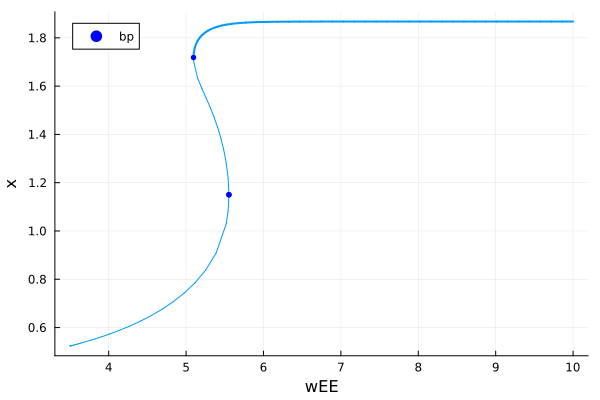

In [45]:
plot(br)

In [47]:
hp_codim2_1 = continuation(br, 1, (@lens _.γY),
	ContinuationPar(opts_con, pMin = -10.0, pMax = 10.0,
		ds = 0.001, dsmax = 0.1, dsmin = 1e-5),
	# detection of codim 2 bifurcations with bisection
	detectCodim2Bifurcation = 2,
	# tell to start the Hopf problem using eigen elements: compute left eigenvector
	startWithEigen = true,
	# we update the Hopf problem at every continuation step
	updateMinAugEveryStep = 1,
	# compute both sides of the initial condition
	bothside = true,
    verbosity = 3
	)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
────────────────── PALC ──────────────────

━━━━━━━━━━━━━━━━━━  INITIAL GUESS   ━━━━━━━━━━━━━━━━━━


──▶ convergence of initial guess = OK

──▶ parameter = 0.0, initial step

━━━━━━━━━━━━━━━━━━ INITIAL TANGENT  ━━━━━━━━━━━━━━━━━━
──▶ convergence of the initial guess = OK

──▶ parameter = 6.666666666666667e-6, initial step (bis)


Predictor:  Secant


───────────────────────────────────────────────────────
Continuation Step 0 
Step size = 1.0000e-03
Parameter γY = 0.0000e+00 ⟶  1.4142e-03 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY

 = 0.0000e+00 ⟶  1.4142e-03
──> Computed 4 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
──> Event values: (0.5030024587518522, 1.414213562373095, 0)
              ──> (0.5030508327824923, 1.4096179366855242, 0)
───────────────────────────────────────────────────────
Continuation Step 1 
Step size = 1.2222e-03
Parameter γY = 1.4142e-03 ⟶  3.1371e-03 [guess]
──> Step Converged in 0 Nonlinear Iteration(s)
Parameter γY = 1.4142e-03 ⟶  3.1371e-03
──> Computed 5 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
──> Event values: (0.5030508327824923, 1.4096179366855242, 0)
              ──> (0.5031096071327913, 1.4096179366855248, 0)
───────────────────────────────────────────────────────
Continuation Step 2 
Step size = 1.8333e-03
Parameter γY = 3.1371e-03 ⟶  5.7214e-03 [guess]
──> Step Converged in 0 Nonlinear Iteration(s)
Parameter γY = 3.1371e-03 ⟶  5.7214e-03
──> Computed 5 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
──> Event values: (0.503

Predictor:  Secant
──> Event values: (0.5104275081235455, 1.4106691574197254, 0)
              ──> (0.5116977548161651, 1.410867380289985, 0)
───────────────────────────────────────────────────────
Continuation Step 17 
Step size = 5.6024e-02
Parameter γY = 3.3791e-01 ⟶  4.1695e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 3.3791e-01 ⟶  4.1696e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.5116977548161651, 1.410867380289985, 0)
              ──> (0.5130390182423475, 1.411088117294344, 0)
───────────────────────────────────────────────────────
Continuation Step 18 
Step size = 6.8474e-02
Parameter γY = 4.1696e-01 ⟶  5.1359e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 4.1696e-01 ⟶  5.1360e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.5130390182423475, 1.411088117294344, 0)
              ──> (0.5143915982370041, 1.41132979

───────────────────────────────────────────────────────
Continuation Step 33 
Step size = 1.0000e-01
Parameter γY = 2.4684e+00 ⟶  2.6097e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 2.4684e+00 ⟶  2.6097e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.5059042389535756, 1.4133970423202917, 0)
              ──> (0.5039209075144473, 1.4134506195523502, 0)
───────────────────────────────────────────────────────
Continuation Step 34 
Step size = 1.0000e-01
Parameter γY = 2.6097e+00 ⟶  2.7511e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 2.6097e+00 ⟶  2.7511e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.5039209075144473, 1.4134506195523502, 0)
              ──> (0.5018463170753016, 1.4134991283456741, 0)
───────────────────────────────────────────────────────
Continuation Step 35 
Step size = 1.0000e-01
Parameter γY = 2.7511e+00

──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 2.8924e+00 ⟶  3.0338e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.49969008886377425, 1.4135431853120954, 0)
              ──> (0.49746085227650355, 1.413583316433495, 0)
───────────────────────────────────────────────────────
Continuation Step 37 
Step size = 1.0000e-01
Parameter γY = 3.0338e+00 ⟶  3.1752e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 3.0338e+00 ⟶  3.1752e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.49746085227650355, 1.413583316433495, 0)
              ──> (0.49516637382372913, 1.4136199725382204, 0)
───────────────────────────────────────────────────────
Continuation Step 38 
Step size = 1.0000e-01
Parameter γY = 3.1752e+00 ⟶  3.3165e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 3.1752e+00 ⟶  3.3165e+00
──> Computed 5 eigenvalues in 1 itera

──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.45918431817553645, 1.4139170508951526, 0)
              ──> (0.4564868025980484, 1.413929130518741, 0)
───────────────────────────────────────────────────────
Continuation Step 53 
Step size = 1.0000e-01
Parameter γY = 5.2959e+00 ⟶  5.4373e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 5.2959e+00 ⟶  5.4373e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.4564868025980484, 1.413929130518741, 0)
              ──> (0.4537860949313936, 1.4139404908012743, 0)
───────────────────────────────────────────────────────
Continuation Step 54 
Step size = 1.0000e-01
Parameter γY = 5.4373e+00 ⟶  5.5787e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 5.4373e+00 ⟶  5.5787e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.4537860949313936, 1.413940490


──> Event values: (0.4164462955123268, 1.4140477043549404, 0)
              ──> (0.4138546913198557, 1.4140528225924476, 0)


───────────────────────────────────────────────────────
Continuation Step 69 
Step size = 1.0000e-01
Parameter γY = 7.5583e+00 ⟶  7.6997e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 7.5583e+00 ⟶  7.6997e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.4138546913198557, 1.4140528225924476, 0)
              ──> (0.41127713991729253, 1.4140577088094728, 0)
───────────────────────────────────────────────────────
Continuation Step 70 
Step size = 1.0000e-01
Parameter γY = 7.6997e+00 ⟶  7.8411e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 7.6997e+00 ⟶  7.8411e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.41127713991729253, 1.4140577088094728, 0)
              ──> (0.4087141532507499, 1.4140623767834475, 0)
───────────────────────────────────────────────────────
Continuation Step 71 
Step size = 1.0000e-01
Parameter γY = 7.8411e+

Step size = 1.0000e-01
Parameter γY = 9.8208e+00 ⟶  9.9622e+00 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 9.8208e+00 ⟶  9.9622e+00
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.374560396443987, 1.4141105807612693, 0)
              ──> (0.37225343316789167, 1.414113107542705, 0)
───────────────────────────────────────────────────────
Continuation Step 86 
Step size = 1.0000e-01
Parameter γY = 9.9622e+00 ⟶  1.0000e+01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = 1.0000e+01 ⟶  1.0000e+01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (0.37225343316789167, 1.414113107542705, 0)
              ──> (0.37165120804724044, NaN, 0)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
────────────────── PALC ──────────────────

━━━━━━━━━━━━━━━━━━  INITIAL GUESS   ━━━━━━━━━━━━━━━━━━
──▶ convergence of initial guess = OK

──▶ parameter = 0.0, init

Excessive output truncated after 524300 bytes.

Parameter γY = -8.8947e-02 ⟶  -1.1263e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
──> Event values: (0.4997157986441389, 1.409173577208481, 0)
              ──> (0.4987548973307682, 1.4090433538191218, 0)
───────────────────────────────────────────────────────
Continuation Step 12 
Step size = -2.0541e-02
Parameter γY = -1.1263e-01 ⟶  -1.4157e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter γY = -1.1263e-01 ⟶  -1.4157e-01
──> Computed 5 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant


 ┌─ Curve type: FoldCont
 ├─ Number of points: 256
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter γY starts at 10.0, ends at 10.0
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1, endpoint at γY ≈ +10.00000000,                                                                     step =   0
- #  2,       bt at γY ≈ -1.13152522 ∈ (-1.13228784, -1.13152522), |δp|=8e-04, [converged], δ = ( 0,  0), step = 117, eigenelements in eig[118], ind_ev =   0
- #  3,       bt at γY ≈ -1.33459057 ∈ (-1.33655238, -1.33459057), |δp|=2e-03, [converged], δ = ( 0,  0), step = 129, eigenelements in eig[130], ind_ev =   0
- #  4,     cusp at γY ≈ -1.40902373 ∈ (-1.40905525, -1.40902373), |δp|=3e-05, [    guess], δ = ( 0,  0), step = 137, eigenelements in eig[138], ind_ev =   0
- #  5, endpoint at γY ≈ +10.00000000,                                                                     step = 255


In [50]:
hp_codim2_1

 ┌─ Curve type: FoldCont
 ├─ Number of points: 256
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter γY starts at 10.0, ends at 10.0
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1, endpoint at γY ≈ +10.00000000,                                                                     step =   0
- #  2,       bt at γY ≈ -1.13152522 ∈ (-1.13228784, -1.13152522), |δp|=8e-04, [converged], δ = ( 0,  0), step = 117, eigenelements in eig[118], ind_ev =   0
- #  3,       bt at γY ≈ -1.33459057 ∈ (-1.33655238, -1.33459057), |δp|=2e-03, [converged], δ = ( 0,  0), step = 129, eigenelements in eig[130], ind_ev =   0
- #  4,     cusp at γY ≈ -1.40902373 ∈ (-1.40905525, -1.40902373), |δp|=3e-05, [    guess], δ = ( 0,  0), step = 137, eigenelements in eig[138], ind_ev =   0
- #  5, endpoint at γY ≈ +10.00000000,                                                                     step = 255


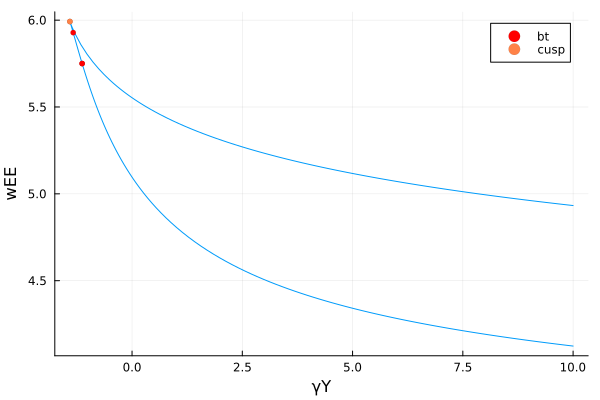

In [48]:
plot(hp_codim2_1)

In [51]:
hp_codim2_1 = continuation(hp_codim2_1[1], 1, (@lens _.γY),
	ContinuationPar(opts_con, pMin = -10.0, pMax = 10.0,
		ds = 0.001, dsmax = 0.1, dsmin = 1e-5),
	# detection of codim 2 bifurcations with bisection
	detectCodim2Bifurcation = 2,
	# tell to start the Hopf problem using eigen elements: compute left eigenvector
	startWithEigen = true,
	# we update the Hopf problem at every continuation step
	updateMinAugEveryStep = 1,
	# compute both sides of the initial condition
	bothside = true,
    verbosity = 3
	)

MethodError: MethodError: no method matching continuation(::NamedTuple{(:wEE, :γY, :BT, :CP, :ZH, :x, :param, :itnewton, :itlinear, :ds, :n_unstable, :n_imag, :stable, :step, :eigenvals, :eigenvecs), Tuple{Float64, Float64, Float64, Float64, Int64, Float64, Float64, Int64, Int64, Float64, Int64, Int64, Bool, Int64, Vector{ComplexF64}, Matrix{ComplexF64}}}, ::Int64, ::Setfield.PropertyLens{:γY}, ::ContinuationPar{Float64, DefaultLS, DefaultEig{typeof(real)}}; detectCodim2Bifurcation::Int64, startWithEigen::Bool, updateMinAugEveryStep::Int64, bothside::Bool, verbosity::Int64)

Some of the types have been truncated in the stacktrace for improved reading. To emit complete information
in the stack trace, evaluate `TruncatedStacktraces.VERBOSE[] = true` and re-run the code.


Closest candidates are:
  continuation(!Matched::BifurcationKit.AbstractResult{Tkind, Tprob}, ::Int64, ::Lens, ::ContinuationPar; bdlinsolver, detectCodim2Bifurcation, kwargs...) where {Tkind<:BifurcationKit.PeriodicOrbitCont, Tprob<:BifurcationKit.WrapPOColl}
   @ BifurcationKit C:\Users\Alex\.julia\packages\BifurcationKit\DlOaK\src\periodicorbit\codim2\PeriodicOrbitCollocation.jl:33
  continuation(!Matched::BifurcationKit.AbstractResult{Tkind, Tprob}, ::Int64, ::Lens, ::ContinuationPar; startWithEigen, detectCodim2Bifurcation, kwargs...) where {Tkind<:BifurcationKit.PeriodicOrbitCont, Tprob<:BifurcationKit.WrapPOSh}
   @ BifurcationKit C:\Users\Alex\.julia\packages\BifurcationKit\DlOaK\src\periodicorbit\codim2\StandardShooting.jl:143
  continuation(!Matched::BifurcationKit.AbstractBranchResult, ::Int64, ::Lens, ::ContinuationPar; startWithEigen, detectCodim2Bifurcation, kwargs...)
   @ BifurcationKit C:\Users\Alex\.julia\packages\BifurcationKit\DlOaK\src\codim2\codim2.jl:184
  ...
